In [1]:
import pybamm
import matplotlib as plt


In [2]:
model = pybamm.lithium_ion.DFN()

In [3]:
sim = pybamm.Simulation(model)

In [4]:
sim.solve([0, 3600])

In [5]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Compare models

In [6]:
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.DFN(),
]


In [7]:
sims = []
for model in models:
    sim = pybamm.Simulation(model)
    sim.solve([0, 3600])
    sims.append(sim)

In [8]:
pybamm.dynamic_plot(sims)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [9]:
model.variable_names()

['Time [s]',
 'Time [min]',
 'Time [h]',
 'x [m]',
 'x_n [m]',
 'x_s [m]',
 'x_p [m]',
 'r_n [m]',
 'r_p [m]',
 'Current variable [A]',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Throughput capacity [A.h]',
 'Discharge energy [W.h]',
 'Throughput energy [W.h]',
 'Porosity',
 'Negative electrode porosity',
 'X-averaged negative electrode porosity',
 'Separator porosity',
 'X-averaged separator porosity',
 'Positive electrode porosity',
 'X-averaged positive electrode porosity',
 'Porosity change',
 'Negative electrode porosity change [s-1]',
 'X-averaged negative electrode porosity change [s-1]',
 'Separator porosity change [s-1]',
 'X-averaged separator porosity change [s-1]',
 'Positive electrode porosity change [s-1]',
 'X-averaged positive electrode porosity change [s-1]',
 'Negative electrode interface utilisation variable',
 'X-averaged negative electrode interface utilisation variable',
 'Negative electrode interface utilisation',


In [10]:
model.variables.search("electrolyte")

Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte concentration concatenation [mol.m-3]
Electrolyte convection flux [mol.m-2.s-1]
Electrolyte current density [A.m-2]
Electrolyte diffusion flux [mol.m-2.s-1]
Electrolyte flux [mol.m-2.s-1]
Electrolyte migration flux [mol.m-2.s-1]
Electrolyte potential [V]
Electrolyte transport efficiency
Gradient of electrolyte potential [V.m-1]
Gradient of negative electrolyte potential [V.m-1]
Gradient of positive electrolyte potential [V.m-1]
Gradient of separator electrolyte potential [V.m-1]
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential [V]
Negative electrolyte transport efficiency
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electrolyte potential [V]
Positive electrolyte transport efficiency
Separator electrolyte concentration [Molar]
Separat

In [11]:
output_variables = ["Electrolyte concentration [mol.m-3]", "Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [12]:
output_variables = ["Voltage [V]"]
sim.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

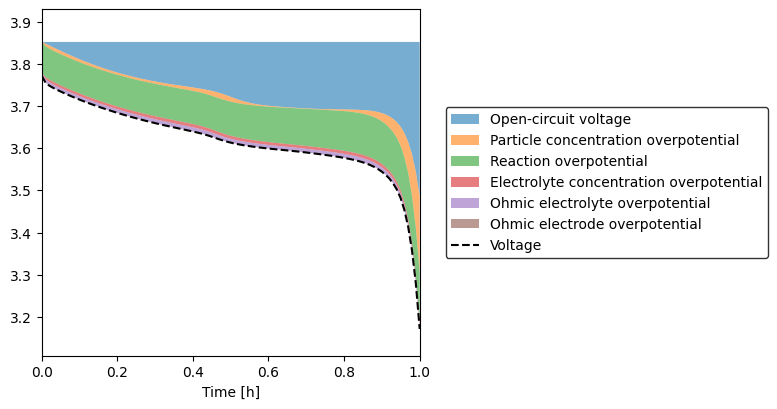

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [13]:
sim.plot_voltage_components()

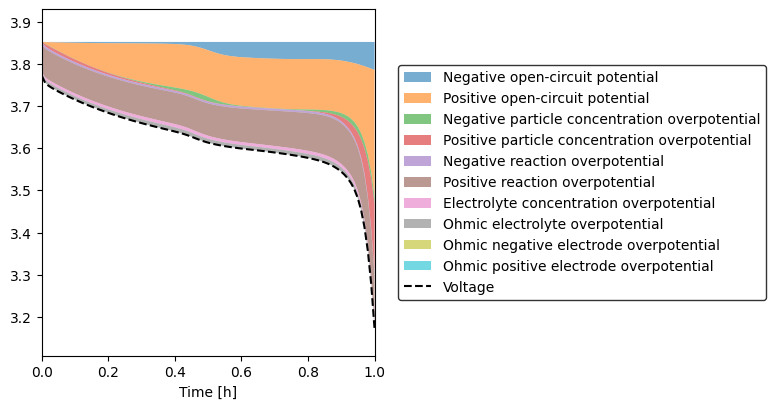

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [14]:
sim.plot_voltage_components(split_by_electrode=True)

# How to change the whole parameter set


In [15]:
parameter_values = pybamm.ParameterValues("Chen2020")

In [16]:
parameter_values

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x31d8de2a0>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x31d8dd440>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial concentrati

In [17]:
parameter_values["Electrode height [m]"]

0.065

In [18]:
parameter_values.search("electrolyte")

EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x31d8de2a0>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x31d8dd440>
Initial concentration in electrolyte [mol.m-3]	1000.0
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Positive electrode Bruggeman coefficient (electrolyte)	1.5
Separator Bruggeman coefficient (electrolyte)	1.5


In [19]:
model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3600])
sim.plot()


interactive(children=(FloatSlider(value=0.0, description='t', max=3555.448018668048, step=35.55448018668048), …

We often want to quickly change a small number of parameter values to investigate how the behaviour or the battery changes. In such cases, we can change parameter values directly in notebook or script we are working in as we demonstrate in this section.

Parameters can either have a constant value or be a function of a model variable. These dependencies are hardcoded into the PyBaMM models. In order to check what are the specific parameters that a model requires, and whether they must be constants or they can be functions, we can call the print_parameter_info method.

In [20]:
model.print_parameter_info()

┌───────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Parameter                                                 │ Type of parameter                                                                                                                                                                                           │
├───────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Lower voltage cut-off [V]                                 │ Parameter                                                                                                                             

The table shows all the parameters that need to be provided to the model (in this case DFN). For example, we see that we need to define (amongst others) the Negative electrode thickness [m], which is defined to be a Parameter. This means it can only have a constant value. In contrast, other parameters are defined to be a FunctionParameter, which means that they can depend on model variables. For example, the Current function [A] is a FunctionParameter that can depend on Time [s].

Note that a FunctionParameter can always be defined to be a constant (i.e. like if it was a Parameter), but a Parameter cannot be defined to be a function. This is because these dependencies are hardcoded in the model definitions.

In [21]:
parameter_values["Current function [A]"] = 10

In [22]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1703.0716533917332, step=17.03071653391733),…

In [23]:
import numpy as np


def my_current(t):
    return pybamm.sin(2 * np.pi * t / 60)


parameter_values["Current function [A]"] = my_current

PyBaMM will assume that the arguments are defined exactly as in the print_parameter_info table above, so the actual name given to the arguments does not matter, but the order does. For example, for the Electrolyte conductivity [S.m-1], it will assume that the first argument is Electrolyte concentration [mol.m-3] and the second is Temperature [K].

We can now solve the model again. In this case, we will pass t_eval to be an array of the points we want to evaluate our solution to the solver (rather than the start and end points only) to make sure we have enough time points to resolve the sinusoidal function in our output.

In [24]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)
t_eval = np.arange(0, 121, 1)
sim.solve(t_eval=t_eval)
sim.plot(["Current [A]", "Voltage [V]"])


interactive(children=(FloatSlider(value=0.0, description='t', max=120.0, step=1.2), Output()), _dom_classes=('…

Input parameters

If the value of a parameter is expected to change often (e.g. running a parameter sweep) is is more convenient to set a parameter as an “input parameter”. This is a placeholder that can be filled in with a numerical value when the model is solved.

To set a parameter as an input parameter, we can set its value to the string [input] in the parameter values dictionary. For example, we can set the Current function [A] to be an input parameter and then run a parameter sweep over different current values like so:

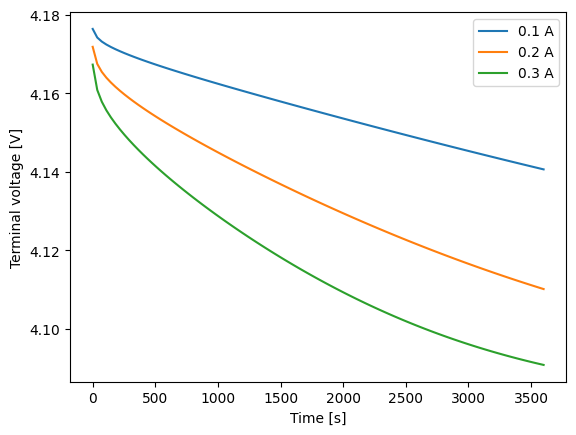

In [25]:
import matplotlib.pyplot as plt

parameter_values["Current function [A]"] = "[input]"
sim = pybamm.Simulation(model, parameter_values=parameter_values)
solns = []
for c in [0.1, 0.2, 0.3]:
    soln = sim.solve([0, 3600], inputs={"Current function [A]": c})
    plt.plot(soln["Time [s]"].entries, soln["Voltage [V]"].entries, label=f"{c} A")
    solns.append(soln["Terminal voltage [V]"].entries)
plt.xlabel("Time [s]")
plt.ylabel("Terminal voltage [V]")
plt.legend()
plt.show()

It is often convenient to define the parameter set in a separate file, and then call the parameters into your notebook or script. You can find some examples on how to do so in PyBaMM’s parameter library. You can copy one of the parameter sets available into a new file and modify it accordingly for the new parameter set. Then, whenever the set is needed, one can import the get_parameter_values method from the corresponding file and call it to obtain a copy of the parameter values.

# How to run experiements
in some cases we might want to prescribe a given voltage, a given power or switch between different conditions to simulate experimental setups. We can use the Experiment class for these simulations.

We start defining an experiment, which consists on a set of instructions on how to cycle the battery. These instructions can be defined in two different ways, but the simplest is to use strings. The instructions can be of the form "(Dis)charge at x A/C/W", "Rest", or "Hold at x V". The instructions can also include how long each step should run for. The duration is introduced by the word "for" followed by the duration, e.g. "for 10 seconds", "for 3 minutes" or "for 1 hour". Terminating conditions can also be specified. In this case, the step will stop when that condition is met. These conditions should be a circuit state and are introduced by the word "until", e.g. "until 1 A", "until C/50" or "until 3 V". Duration and termination conditions can be combined using the word "or" and the step will either finish when the condition is met or after the specified duration (whichever happens first).

Some examples of experiment instructions are:

In [26]:
"Discharge at 1C for 0.5 hours",
"Discharge at C/20 for 0.5 hours",
"Charge at 0.5 C for 45 minutes",
"Discharge at 1 A for 90 seconds",
"Charge at 200mA for 45 minutes",
"Discharge at 1 W for 0.5 hours",
"Charge at 200 mW for 45 minutes",
"Rest for 10 minutes",
"Hold at 1 V for 20 seconds",
"Charge at 1 C until 4.1V",
"Hold at 4.1 V until 50 mA",
"Hold at 3V until C/50",

('Hold at 3V until C/50',)

These steps can be concatenated in a list, so they are executed sequentially. To create an experiment, the list can then be passed when creating an Experiment object:

In [27]:
experiment = pybamm.Experiment(
    [
        "Discharge at C/10 for 10 hours or until 3.3 V",
        "Rest for 1 hour",
        "Charge at 1 A until 4.1 V",
        "Hold at 4.1 V until 50 mA",
        "Rest for 1 hour",
    ]
)

In order to reproduce real cycling conditions, often the experiments will be composed of several “cycles”, where a cycle is a user-defined collection of steps. In PyBaMM, we can define a cycle as a tuple of steps, which means that we can process the solution in terms of cycles. For more information on this functionality, please see the long experiments notebook. We can also leverage the list addition and multiplication operators to combine and repeat cycles. For example, if we want a three cycles of constant current C/10 discharge, a one hour rest, a constant current (1 A) constant voltage (4.1 V) and another one hour rest, followed by a cycle of 1C discharge we can write:

In [ ]:
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.3 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour",
        )
    ]
    * 3
    + [
        "Discharge at 1C until 3.3 V",
    ]
)

Then we can choose our model and create our simulation, passing our experiment using a keyword argument

In [28]:
model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model, experiment=experiment)


We then solve and plot the solution

In [29]:


sim.solve()
sim.plot()


At t = 339.952, , mxstep steps taken before reaching tout.


interactive(children=(FloatSlider(value=0.0, description='t', max=13.076887102336224, step=0.13076887102336224…

The solution variable in the simulation object has a cycles variable that allows to access the solution for a specific cycle. That solution can be processed and plotted as usual. For example, if we want to plot the first cycle only we can do

In [31]:
sim.solution.cycles[2].plot()

interactive(children=(FloatSlider(value=11.000000000000002, description='t', max=11.766837211960748, min=11.00…

In [32]:
pybamm.step.string(
    "Discharge at 1C for 1 hour", period="1 minute", temperature="25oC", tags=["tag1"]
)

Step(1.0, duration=1 hour, period=1 minute, temperature=25oC, tags=['tag1'], description=Discharge at 1C for 1 hour, direction=Discharge)

# Managing simulation outputs
In the previous tutorials we have interacted with the outputs of the simulation via the default plotting functionality. However, usually we need to access the output data to manipulate it or transfer to another software, which is the topic of this notebook.



In [34]:
# we start by building and solving a model : 

model = pybamm.lithium_ion.SPMe()
sim = pybamm.Simulation(model)
sim.solve([0, 3600])

In [35]:
solution = sim.solution

In [36]:
solution

In [37]:
t = solution["Time [s]"]
V = solution["Voltage [V]"]

In [38]:
V.entries

array([3.77057396, 3.75319038, 3.7457915 , 3.74050212, 3.73592279,
       3.73164332, 3.72753276, 3.72354826, 3.71967566, 3.71591122,
       3.71225551, 3.70870984, 3.70527536, 3.70195259, 3.69874152,
       3.69564164, 3.69265192, 3.68977078, 3.6869962 , 3.68432579,
       3.68175681, 3.67928624, 3.67691079, 3.67462692, 3.67243081,
       3.67031838, 3.66828523, 3.66632651, 3.66443681, 3.66260997,
       3.66083875, 3.65911439, 3.65742609, 3.65576015, 3.654099  ,
       3.65241994, 3.65069368, 3.6488831 , 3.6469425 , 3.64481864,
       3.64245489, 3.63980029, 3.63682425, 3.6335347 , 3.6299929 ,
       3.62631469, 3.62265168, 3.61915659, 3.61594814, 3.61309112,
       3.61059684, 3.60843741, 3.60656398, 3.60492174, 3.60345926,
       3.60213291, 3.60090803, 3.59975826, 3.59866435, 3.59761271,
       3.59659416, 3.59560291, 3.5946357 , 3.59369119, 3.59276942,
       3.59187135, 3.59099853, 3.59015263, 3.58933506, 3.58854653,
       3.58778657, 3.58705297, 3.58634124, 3.58564407, 3.58495

post-processed variables can be called at any time, which will return the interpolated value from the data above

In [39]:
V([200, 400, 780, 1236])  # times in seconds

array([3.72958804, 3.70870984, 3.67821729, 3.65411561])

In [40]:
#to save the simulation : 
sim.save("SPMe.pkl")

If you now check the root directory of your notebooks you will notice that a new file called "SPMe.pkl" has appeared. We can load the stored simulation doing

In [41]:
sim2 = pybamm.load("SPMe.pkl")

Note that while exporting .pkl works for all variables, exporting to .csv and .mat only works for 0D variables (i.e. variables the do not depend on space, only on time).